# Objective

The goal of this project is to compare the performance of different machine learning algorithms on the Titanic dataset.  
Specifically, we will:

- Train and evaluate the following models: **Decision Tree, Random Forest, SVM, kNN, and Naive Bayes**.  
- Compare their performance using metrics such as **Accuracy, Precision, Recall, F1-score, and ROC-AUC**.  
- Summarize results to identify the most effective model for this dataset.


In [4]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [5]:
# Load Titanic dataset (Kaggle)
data = pd.read_csv("titanic/train.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Exploration & Preprocessing

- Handle missing values
- Encode categorical variables (if needed)
- Scale features


In [6]:
# Drop columns not useful for prediction
data = data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

# Handle missing values
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

# Encode categorical variables
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])       # male=1, female=0
data["Embarked"] = le.fit_transform(data["Embarked"])

# Features and Target
X = data.drop("Survived", axis=1)
y = data["Survived"]

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Model Training and Evaluation
We will train 5 models and compare their performance.


In [8]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "kNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    })

df_results = pd.DataFrame(results)
df_results


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Decision Tree,0.832402,0.800000,0.753623,0.776119,0.816798
1,Random Forest,0.815642,0.790323,0.710145,0.748092,0.845389
2,SVM,0.815642,0.846154,0.637681,0.727273,0.838735
3,kNN,0.815642,0.790323,0.710145,0.748092,0.844137
4,Naive Bayes,0.782123,0.727273,0.695652,0.711111,0.832806


## Visualization

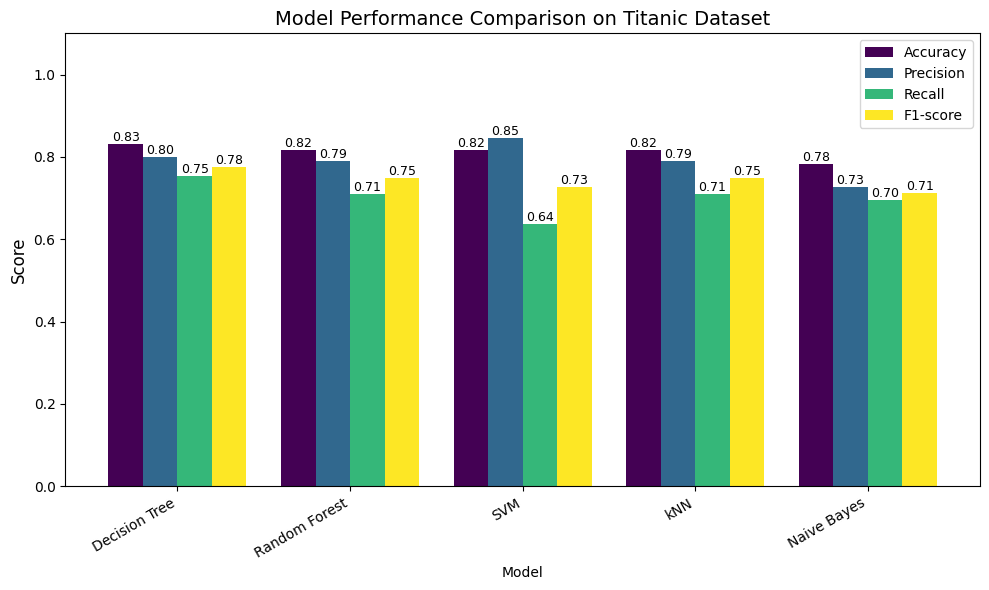

In [12]:

ax = df_results.set_index("Model")[["Accuracy","Precision","Recall","F1-score"]].plot(
    kind="bar", figsize=(10,6), colormap="viridis", width=0.8
)

plt.title("Model Performance Comparison on Titanic Dataset", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=30, ha="right", fontsize=10)  # Rotate & align labels
plt.ylim(0, 1.1)  # keep scale between 0 and 1

# Annotate bar values
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=9)

plt.tight_layout()
plt.show()



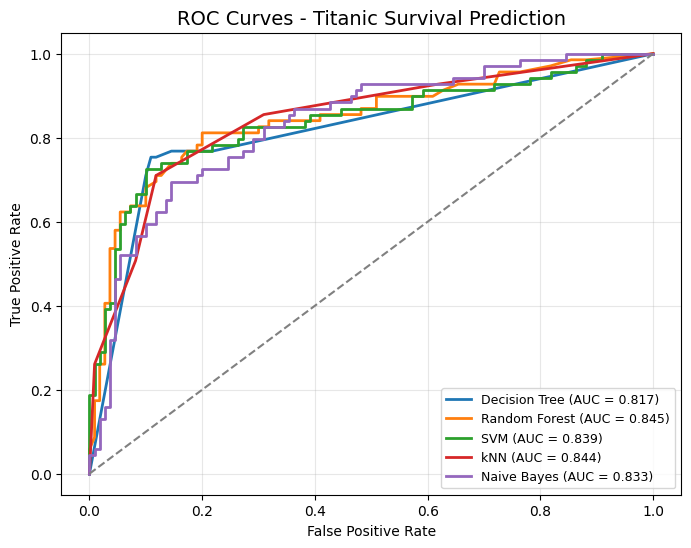

In [13]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):   # models that support predict_proba
        y_prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')
    elif hasattr(model, "decision_function"):  # e.g., SVM
        y_score = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

# Plot ROC baseline
plt.plot([0,1], [0,1], color='gray', linestyle='--')

plt.title("ROC Curves - Titanic Survival Prediction", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", fontsize=9)
plt.grid(alpha=0.3)
plt.show()


## Conclusion
- The **Decision Tree** achieved the highest accuracy (83.2%).  
- The **Random Forest** achieved the best ROC-AUC score (0.845), showing strong classification ability.  
- The **SVM** achieved the best precision (0.846), though its recall was lower.  
- **Naive Bayes** underperformed compared to others.  

Overall, **Random Forest** appears to be the most balanced and reliable model for Titanic survival prediction.  
